In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import colormaps as cmaps

In [36]:
def load_df(path):
    df = pd.read_csv(path)
    initial_rows = np.where(df['epoch'] == 0)[0]
    df.drop(index=initial_rows, inplace=True)
    return df

k250_df = load_df("./rep_250_losses_by_epoch.csv")
k500_df = load_df("./rep_500_losses_by_epoch.csv")
k1000_df = load_df("./rep_1000_losses_by_epoch.csv")
k2500_df = load_df("./rep_2500_losses_by_epoch.csv")
k5000_df = load_df("./rep_5000_losses_by_epoch.csv")



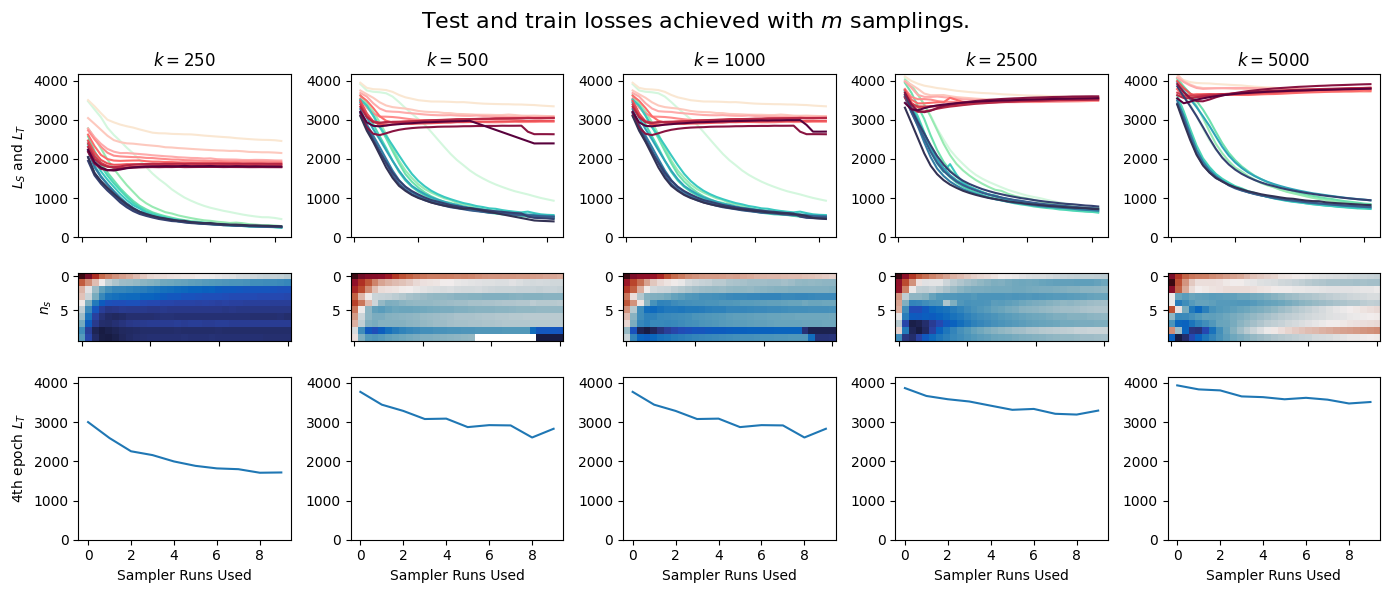

In [46]:
fig, axs = plt.subplots(3, 5, figsize=(14,6))

ax1 = (axs[0,0], axs[1,0], axs[2,0])
ax2 = (axs[0,1], axs[1,1], axs[2,1])
ax3 = (axs[0,2], axs[1,2], axs[2,2])
ax4 = (axs[0,3], axs[1,3], axs[2,3])
ax5 = (axs[0,4], axs[1,4], axs[2,4])

max_loss = max([
    df["test_loss"].max()
    for df in [k250_df, k500_df, k2500_df, k5000_df]
])

def set_axis(axs):
    axs[0].set_ylabel("$L_S$ and $L_T$")
    axs[1].set_ylabel("$n_{s}$")
    axs[2].set_ylabel(f"4th epoch $L_T$")


def plot(kdf, axs, k):
    loss_colors = cmaps.bl_11.discrete(10).colors
    test_colors = list(reversed(cmaps.fushia_red_pink1.discrete(10).colors))

    for run in kdf['run'].unique():
        run_df = kdf[kdf['run'] == run]
        axs[0].plot(run_df['epoch'], run_df["loss"], label=run, color=loss_colors[run])
        axs[0].plot(run_df['epoch'], run_df["test_loss"], label=run, color=test_colors[run])


    axs[0].set_title(f"$k={k}$")
    axs[0].set_ylim([0, max_loss])
    axs[0].tick_params(
        axis='x', 
        labelbottom=False,
    )

    loss_matrix = kdf.set_index(['run', 'epoch'])['test_loss'].unstack().values
    axs[1].imshow(loss_matrix, cmap=cmaps.balance)#, vmin=0, vmax=max_loss)
    axs[1].set_xlabel("Epoch")
    
    epoch4_df = kdf[kdf['epoch'] == 4]
    axs[2].plot(epoch4_df['run'], epoch4_df['test_loss'])
    axs[2].set_ylim([0, max_loss])
    axs[2].set_xlabel("Sampler Runs Used ($n_s$)")

plot(k250_df, ax1, 250)
plot(k500_df, ax2, 500)
plot(k1000_df, ax3, 1000)
plot(k2500_df, ax4, 2500)
plot(k5000_df, ax5, 5000)

set_axis(ax1)

fig.suptitle("Test and train losses achieved with $m$ samplings.", fontsize=16)
fig.tight_layout()

plt.savefig("./test_losses.png", dpi=400)
plt.show()